In [1]:
import numpy as np
import pandas as pd 
from sklearn.svm import SVC ,LinearSVC
from sklearn.model_selection import train_test_split ,GridSearchCV 
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv('C:/Users/moham/OneDrive/Desktop/spam.csv')

In [3]:
data

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5572 non-null   object
 1   EmailText  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
data.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


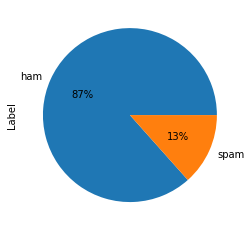

In [10]:
classes = pd.value_counts(data["Label"], sort= True)
classes.plot(kind = 'pie',  autopct='%1.0f%%')
plt.show()

In [6]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
from imblearn.over_sampling import SMOTE

In [23]:
#data.loc[data['Label']=='spam','Label',]=0
#data.loc[data['Label']=='ham','Label',]=1

In [12]:
X = data['EmailText'].values 
Y = data['Label'].values 

In [13]:
cv = CountVectorizer() 

In [14]:
#Splitting Data into Train Test 
X_train, X_test, y_train, y_test = train_test_split( X, Y, train_size=0.8, random_state=0) 

In [15]:
X_train = cv.fit_transform(X_train)

In [16]:
X_test = cv.transform(X_test)

In [17]:
print(X_train)

  (0, 4711)	2
  (0, 6732)	1
  (0, 3689)	2
  (0, 3827)	1
  (0, 3422)	2
  (0, 3203)	1
  (0, 906)	1
  (0, 6881)	1
  (0, 2465)	1
  (1, 898)	1
  (1, 3582)	2
  (1, 2605)	1
  (1, 6698)	1
  (1, 4761)	1
  (1, 3123)	1
  (1, 6814)	1
  (1, 7269)	1
  (1, 3839)	1
  (1, 2775)	1
  (1, 4429)	1
  (2, 3689)	1
  (2, 7289)	1
  (2, 7233)	1
  (2, 2973)	1
  (2, 4587)	1
  :	:
  (4454, 5827)	1
  (4454, 3819)	1
  (4454, 2301)	1
  (4454, 4914)	1
  (4454, 7235)	1
  (4455, 7552)	1
  (4455, 7579)	1
  (4455, 3302)	1
  (4455, 4045)	1
  (4455, 2277)	1
  (4455, 4120)	1
  (4455, 5713)	1
  (4455, 4187)	1
  (4455, 6335)	1
  (4456, 6814)	2
  (4456, 7579)	3
  (4456, 3466)	1
  (4456, 6639)	1
  (4456, 814)	1
  (4456, 6581)	1
  (4456, 7457)	2
  (4456, 961)	1
  (4456, 3324)	1
  (4456, 2141)	1
  (4456, 6436)	1


In [18]:
print(X_test)

  (0, 842)	1
  (0, 1880)	1
  (0, 3815)	1
  (0, 3962)	1
  (0, 5152)	1
  (0, 6019)	1
  (0, 6814)	1
  (0, 6847)	1
  (0, 7063)	1
  (1, 2733)	1
  (1, 4870)	1
  (1, 6696)	1
  (1, 7261)	1
  (2, 890)	1
  (2, 924)	1
  (2, 983)	1
  (2, 1010)	1
  (2, 1956)	1
  (2, 1996)	1
  (2, 2350)	2
  (2, 2675)	1
  (2, 2775)	1
  (2, 2894)	1
  (2, 3242)	1
  (2, 3357)	1
  :	:
  (1114, 402)	1
  (1114, 890)	1
  (1114, 924)	1
  (1114, 1540)	1
  (1114, 1897)	1
  (1114, 3068)	1
  (1114, 3072)	1
  (1114, 3302)	1
  (1114, 3689)	2
  (1114, 3700)	1
  (1114, 3927)	1
  (1114, 4329)	1
  (1114, 4916)	1
  (1114, 5992)	1
  (1114, 6432)	1
  (1114, 6576)	2
  (1114, 6690)	1
  (1114, 6696)	2
  (1114, 6814)	3
  (1114, 7284)	1
  (1114, 7309)	1
  (1114, 7355)	1
  (1114, 7365)	2
  (1114, 7579)	1
  (1114, 7584)	1


In [20]:
#smote to overcome class inbalance 
smote = SMOTE()
X_train_smote , y_train_smote = smote.fit_resample(X_train,y_train)
print(X_train_smote.shape,y_train_smote.shape)

(7752, 7619) (7752,)


In [27]:
#used Linear Support Vectore Machine as it shows a slight higher accuracy than Support Vector Machine 
model=SVC(kernel = 'rbf', random_state = 0)
model.fit(X_train_smote,y_train_smote)

SVC(random_state=0)

In [28]:
prediction_on_training_data = model.predict(X_train_smote)

In [30]:
# find accuracy on training data and Model Score

accuracy_on_training_data = accuracy_score(y_train_smote, prediction_on_training_data)
print("Accuracy on training data is:",accuracy_on_training_data)

Accuracy on training data is: 0.9855521155830753


In [31]:
#testing with given sample inputs
string1=['Hey, you have won a car !!!!. Conrgratzz']
string2 = ['Dear applicant, Your CV has been recieved. Best regards']
string3 = ['You have received $1000000 to your account']
string4 = ['Join with our whatsapp group']
string5 = ['Kindly check the previous email. Kind Regards']

In [32]:
#results -> 'ham' = Ham Mail and 'spam' = Spam Mail
print(model.predict(cv.transform(string1)))
print(model.predict(cv.transform(string2)))
print(model.predict(cv.transform(string3)))
print(model.predict(cv.transform(string4)))
print(model.predict(cv.transform(string5)))

['spam']
['ham']
['spam']
['spam']
['ham']
